In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
info_df_raw = pd.read_csv("/content/drive/My Drive/데이터분석/samsung/info1.csv")
feat_df_raw = pd.read_csv("/content/drive/My Drive/데이터분석/samsung/samp_cst_feat.csv")
train_df_raw = pd.read_csv("/content/drive/My Drive/데이터분석/samsung/samp_train.csv")
dtype_df_raw = pd.read_excel("/content/drive/My Drive/데이터분석/samsung/variable_dtype.xlsx")

In [4]:
info_df = info_df_raw.copy()
feat_df = feat_df_raw.copy()
train_df = train_df_raw.copy()

In [5]:
info_df_raw #가맹점은 다 다른데 카테고리가 겹치는 애들은 더 가중치 줄 필요 있을듯

,MRC_ID_DI,Category
0,0,미이용
1,1,홈쇼핑
2,2,종합물
3,3,종합몰
4,4,전문몰
5,5,종합몰
6,6,홈쇼핑
7,7,오픈마켓_소셜
8,8,홈쇼핑
9,9,전문몰


In [6]:
feat_df_raw.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,-0.18782,-0.23752,-0.10148,-0.16942,0.02893,0.03702,0.04855,0.36531,0.24302,-0.30677,-0.20810,-0.12376,0.15054,0,0.22430,0.10513,0.3797,-0.16796,0.01456,-0.10743,0,1,-0.08246,-0.38202,0,0,0.02066,0.28113,0.05687,-0.11689,0.16837,1,1,-0.08043,0.21618,-0.20256,0.23597,0.06233,0.3285,0.05898,0.00544,-0.29231,0.02483,-0.38122,0.0065,0.39975,0.09775,-0.34015

In [7]:
feat_df_raw.dtypes.head(10) #dtypes 엑셀파일 이용해서 카테고리컬 변수 변환

cst_id_di      int64
VAR002       float64
VAR003       float64
VAR004       float64
VAR005       float64
VAR006       float64
VAR007         int64
VAR008       float64
VAR009       float64
VAR010       float64
dtype: object

In [8]:
train_df_raw.head()

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6


In [9]:
dtype_dict = dtype_df_raw.set_index('Variable_Name')['dType'].to_dict()

In [10]:
#카테고리컬 변수타입 변환
for w in feat_df_raw.columns:
  if w in dtype_dict.keys():
    if dtype_dict[w] == "categorical":
      feat_df[w] = feat_df_raw[w].astype(str)
feat_df.dtypes.head(10)

cst_id_di      int64
VAR002       float64
VAR003       float64
VAR004       float64
VAR005       float64
VAR006       float64
VAR007        object
VAR008       float64
VAR009       float64
VAR010       float64
dtype: object

In [11]:
#카테고리컬 변수들 행 이름
obj_col = []
numerical_col = [] 
for w in dtype_dict:
  if dtype_dict[w] == "categorical":
    obj_col.append(w)
  else:
    numerical_col.append(w)

In [12]:
##categorical은 다 dummy variables
for i in obj_col:
  print(feat_df[i].value_counts())
  print()

0    8633
1    1491
Name: VAR007, dtype: int64

0    5430
1    4694
Name: VAR015, dtype: int64

0    8009
1    2115
Name: VAR018, dtype: int64

0    9926
1     198
Name: VAR026, dtype: int64

0    7606
1    2518
Name: VAR059, dtype: int64

0    7324
1    2800
Name: VAR066, dtype: int64

1    8723
0    1401
Name: VAR067, dtype: int64

0    8166
1    1958
Name: VAR070, dtype: int64

0    9314
1     810
Name: VAR071, dtype: int64

0    8769
1    1355
Name: VAR077, dtype: int64

0    9738
1     386
Name: VAR078, dtype: int64

0    9515
1     609
Name: VAR094, dtype: int64

0    9158
1     966
Name: VAR096, dtype: int64

0    8956
1    1168
Name: VAR097, dtype: int64

0    9306
1     818
Name: VAR098, dtype: int64

0    8434
1    1690
Name: VAR107, dtype: int64

0    7949
1    2175
Name: VAR111, dtype: int64

0    7452
1    2672
Name: VAR124, dtype: int64

0    7249
1    2875
Name: VAR127, dtype: int64

0    9952
1     172
Name: VAR143, dtype: int64

0    9485
1     639
Name: VAR144, dtype:

In [13]:
train_df.head(10)

,cst_id_di,MRC_ID_DI
0,90000000089,0
1,90000000176,8
2,90000000210,0
3,90000000212,5
4,90000000213,6
5,90000000263,0
6,90000000322,0
7,90000000354,0
8,90000000407,0
9,90000000408,0


In [14]:
train_df.groupby("MRC_ID_DI").sum()

,cst_id_di
MRC_ID_DI,
0,738001873446410
1,7650019500654
2,1260003033581
3,2880007977965
4,990003299072
5,12870030883335
6,49860128414992
7,59490150776353
8,30330077164853


In [15]:
#독립변수들 이름
var_list = feat_df.columns[1:]
var_str = "+".join(var_list)
var_str

'VAR002+VAR003+VAR004+VAR005+VAR006+VAR007+VAR008+VAR009+VAR010+VAR011+VAR012+VAR013+VAR014+VAR015+VAR016+VAR017+VAR018+VAR019+VAR020+VAR021+VAR022+VAR023+VAR024+VAR025+VAR026+VAR027+VAR028+VAR029+VAR030+VAR031+VAR032+VAR033+VAR034+VAR035+VAR036+VAR037+VAR038+VAR039+VAR040+VAR041+VAR042+VAR043+VAR044+VAR045+VAR046+VAR047+VAR048+VAR049+VAR050+VAR051+VAR052+VAR053+VAR054+VAR055+VAR056+VAR057+VAR058+VAR059+VAR060+VAR061+VAR062+VAR063+VAR064+VAR065+VAR066+VAR067+VAR068+VAR069+VAR070+VAR071+VAR072+VAR073+VAR074+VAR075+VAR076+VAR077+VAR078+VAR079+VAR080+VAR081+VAR082+VAR083+VAR084+VAR085+VAR086+VAR087+VAR088+VAR089+VAR090+VAR091+VAR092+VAR093+VAR094+VAR095+VAR096+VAR097+VAR098+VAR099+VAR100+VAR101+VAR102+VAR103+VAR104+VAR105+VAR106+VAR107+VAR108+VAR109+VAR110+VAR111+VAR112+VAR113+VAR114+VAR115+VAR116+VAR117+VAR118+VAR119+VAR120+VAR121+VAR122+VAR123+VAR124+VAR125+VAR126+VAR127+VAR128+VAR129+VAR130+VAR131+VAR132+VAR133+VAR134+VAR135+VAR136+VAR137+VAR138+VAR139+VAR140+VAR141+VAR142+VAR143+VAR14

In [16]:
combine_df = feat_df.copy()
combine_df['label'] = train_df_raw['MRC_ID_DI']

In [17]:
combine_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,-0.18782,-0.23752,-0.10148,-0.16942,0.02893,0.03702,0.04855,0.36531,0.24302,-0.30677,-0.20810,-0.12376,0.15054,0,0.22430,0.10513,0.3797,-0.16796,0.01456,-0.10743,0,1,-0.08246,-0.38202,0,0,0.02066,0.28113,0.05687,-0.11689,0.16837,1,1,-0.08043,0.21618,-0.20256,0.23597,0.06233,0.3285,0.05898,0.00544,-0.29231,0.02483,-0.38122,0.0065,0.39975,0.09775,

In [18]:
y, X = dmatrices('label ~ VAR002+VAR003+VAR004+VAR005+VAR006+VAR007+VAR008+VAR009+VAR010+VAR011+VAR012+VAR013+VAR014+VAR015+VAR016+VAR017+VAR018+VAR019+VAR020+VAR021+VAR022+VAR023+VAR024+VAR025+VAR026+VAR027+VAR028+VAR029+VAR030+VAR031+VAR032+VAR033+VAR034+VAR035+VAR036+VAR037+VAR038+VAR039+VAR040+VAR041+VAR042+VAR043+VAR044+VAR045+VAR046+VAR047+VAR048+VAR049+VAR050+VAR051+VAR052+VAR053+VAR054+VAR055+VAR056+VAR057+VAR058+VAR059+VAR060+VAR061+VAR062+VAR063+VAR064+VAR065+VAR066+VAR067+VAR068+VAR069+VAR070+VAR071+VAR072+VAR073+VAR074+VAR075+VAR076+VAR077+VAR078+VAR079+VAR080+VAR081+VAR082+VAR083+VAR084+VAR085+VAR086+VAR087+VAR088+VAR089+VAR090+VAR091+VAR092+VAR093+VAR094+VAR095+VAR096+VAR097+VAR098+VAR099+VAR100+VAR101+VAR102+VAR103+VAR104+VAR105+VAR106+VAR107+VAR108+VAR109+VAR110+VAR111+VAR112+VAR113+VAR114+VAR115+VAR116+VAR117+VAR118+VAR119+VAR120+VAR121+VAR122+VAR123+VAR124+VAR125+VAR126+VAR127+VAR128+VAR129+VAR130+VAR131+VAR132+VAR133+VAR134+VAR135+VAR136+VAR137+VAR138+VAR139+VAR140+VAR141+VAR142+VAR143+VAR144+VAR145+VAR146+VAR147+VAR148+VAR149+VAR150+VAR151+VAR152+VAR153+VAR154+VAR155+VAR156+VAR157+VAR158+VAR159+VAR160+VAR161+VAR162+VAR163+VAR164+VAR165+VAR166+VAR167+VAR168+VAR169+VAR170+VAR171+VAR172+VAR173+VAR174+VAR175+VAR176+VAR177+var178+VAR179+VAR180+VAR181+VAR182+VAR183+VAR184+VAR185+VAR186+VAR187+VAR188+VAR189+VAR190+VAR191+VAR192+VAR193+VAR194+VAR195+VAR196+VAR197+VAR198+VAR199+VAR200+VAR201+VAR202+VAR203+VAR204+VAR205+VAR206+VAR207+VAR208+VAR209+VAR210+VAR211+VAR212+VAR213+VAR214+VAR215+VAR216+VAR217+VAR218+VAR219+VAR220+VAR221+VAR222+VAR223+VAR224+VAR225+VAR226+VAR227', combine_df, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif =vif.sort_values("VIF Factor",ascending=False)
vif["VIF Factor"] = vif["VIF Factor"].round()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [19]:
vif

,VIF Factor,features
17,inf,VAR111[T.1]
16,inf,VAR107[T.1]
3,inf,VAR018[T.1]
5,inf,VAR059[T.1]
27,inf,VAR199[T.1]
26,inf,VAR179[T.1]
19,inf,VAR127[T.1]
18,inf,VAR124[T.1]
14,inf,VAR097[T.1]
1,inf,VAR007[T.1]


In [20]:
low_vif = list(vif[vif["VIF Factor"]!="inf"]["features"])
del low_vif[-1]

low_vif_columns = []
for i in low_vif:
  low_vif_columns.append(i[0:6])
low_vif_columns

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


['VAR111',
 'VAR107',
 'VAR018',
 'VAR059',
 'VAR199',
 'VAR179',
 'VAR127',
 'VAR124',
 'VAR097',
 'VAR007',
 'VAR216',
 'VAR119',
 'VAR123',
 'VAR060',
 'VAR176',
 'VAR160',
 'VAR052',
 'VAR203',
 'VAR114',
 'VAR076',
 'VAR095',
 'VAR014',
 'VAR204',
 'VAR012',
 'VAR186',
 'VAR168',
 'VAR039',
 'VAR091',
 'VAR032',
 'VAR139',
 'VAR164',
 'VAR089',
 'VAR137',
 'VAR150',
 'VAR202',
 'VAR011',
 'VAR116',
 'VAR058',
 'VAR013',
 'VAR162',
 'VAR061',
 'VAR087',
 'VAR073',
 'VAR196',
 'VAR147',
 'VAR054',
 'VAR217',
 'VAR028',
 'VAR121',
 'VAR068',
 'VAR189',
 'VAR057',
 'VAR152',
 'VAR069',
 'VAR158',
 'VAR027',
 'VAR024',
 'VAR134',
 'VAR191',
 'VAR053',
 'VAR161',
 'VAR154',
 'VAR055',
 'VAR122',
 'VAR120',
 'VAR222',
 'VAR041',
 'VAR198',
 'VAR038',
 'VAR128',
 'VAR218',
 'VAR140',
 'VAR093',
 'VAR079',
 'VAR227',
 'VAR118',
 'VAR085',
 'VAR106',
 'VAR092',
 'VAR184',
 'VAR063',
 'VAR006',
 'VAR157',
 'VAR153',
 'VAR022',
 'VAR159',
 'VAR177',
 'VAR047',
 'VAR035',
 'VAR185',
 'VAR034',

In [37]:
total_df = feat_df_raw.copy()
total_df['label'] = train_df_raw['MRC_ID_DI']
total_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000000089,-0.06610,0.5280,-0.13607,0.10945,0.06557,0,0.7702,-0.18965,0.1981,0.24149,0.32429,-0.18611,0.06960,1,0.0049,0.8085,0,-0.11899,0.03969,-0.16651,0.12037,-0.01715,-0.09941,-0.28878,0,-0.07481,-0.12742,0.14367,0.06725,0.7702,0.04138,-0.01619,-0.32429,0.11580,0.7179,0.16920,-0.08048,0.28126,-0.11289,-0.02092,0.5381,0.22047,0.17756,0.03794,-0.04432,-0.28743,-0.01164,0.26300,-0.15466,-0.08374,-0.12935,-0.24726,-0.32134,0.39311,-0.32813,0.35632,0.12739,1,-0.18338,-0.07717,0.4688,0.18707,-0.03818,-0.04869,1,1,-0.14361,0.20281,0,0,0.02536,-0.20705,0.03747,0.28517,-0.18100,0,0,-0.20069,0.23156,-0.18709,0.20059,0.04329,0.0025,0.13105,-0.00891,0.23236,0.10216,0.28202,0.0077,-0.09886,0.29902,-0.22713,0,-0.23064,0,0,0,0.06628,0.11613,0.0093,0.03583,0.3578,0.20585,1.0000,-0.29631,0,0.0008,0.26873,0.05674,0,0.02082,0.26616,-0.25601,0.16075,0.15089,0.7286,0.07524,-0.11761,-0.13649,0.16103,0.38476,0.18881,0,0.00524,0.29896,1,0.36885,0.05585,0.06960,0.0068,0.05439,-0.04895,0.22997,0.06607,-0.02500,-0.05500,0.0020,0.07158,-0.11915,-0.09522,0.11580,1,0,0,0.35606,-0.32429,0,0.19451,-0.22885,0.01926,-0.15068,0.13834,-0.16525,0.09025,0.01253,0.20219,0.31263,-0.17855,-0.20515,-0.18453,-0.21851,0.37549,-0.10744,0,0.13043,0.0013,-0.17485,0.18986,-0.07305,0.0069,-0.30157,-0.16382,0.28385,-0.14273,-0.27069,0,0.3766,0,0.06165,0.0021,-0.03891,0.04840,-0.14790,0.26533,-0.00426,0.14765,-0.13332,0.03077,0.23017,0.11764,0.5740,0.06403,0.06184,0.04242,-0.04322,0.0051,0.04523,0,0.07247,0.09631,-0.22864,0.07262,-0.08837,0.01070,0.06340,0.12424,0,0.20392,0.24685,0.01432,-0.00966,0.09746,-0.17616,-0.18956,-0.13676,-0.13279,-0.32829,0.19113,0.05449,0.09471,0.27091,0.01931,0.02938,0.17105,0.12537,0.22197,0
1,90000000176,-0.09537,0.1347,-0.13541,0.17331,-0.19657,0,0.0616,-0.23104,0.4940,-0.39476,-0.38366,0.39329,0.17549,0,0.3130,0.6564,0,0.31544,0.03794,-0.30237,-0.34538,0.04368,0.04381,-0.19160,0,-0.09801,-0.04593,0.11228,0.11692,0.5661,0.19938,0.01259,-0.17976,0.20081,0.7454,0.24256,0.01363,-0.22807,0.06728,0.17312,0.5369,0.23387,0.04572,0.05406,-0.18782,-0.23752,-0.10148,-0.16942,0.02893,0.03702,0.04855,0.36531,0.24302,-0.30677,-0.20810,-0.12376,0.15054,0,0.22430,0.10513,0.3797,-0.16796,0.01456,-0.10743,0,1,-0.08246,-0.38202,0,0,0.02066,0.28113,0.05687,-0.11689,0.16837,1,1,-0.08043,0.21618,-0.20256,0.23597,0.06233,0.3285,0.05898,0.00544,-0.29231,0.02483,-0.38122,0.0065,0.39975,0.09775,

In [38]:
open_df = total_df[total_df['label'] == 7]
rest_df = total_df[total_df['label'] != 7]

In [39]:
rest_df = rest_df.sample(frac=1)
new_rest_df = rest_df[:661]

In [40]:
final_df = pd.concat([open_df, new_rest_df])
final_df = final_df.sample(frac=1).reset_index(drop=True)
final_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000273062,-0.02891,0.5286,0.19575,-0.22841,0.44603,0,0.9932,0.32113,0.6048,0.67392,0.49440,-0.55996,-0.23533,1,0.7686,0.4592,1,-0.55948,-0.13284,0.36836,0.05301,-0.07519,-0.15707,0.38564,0,0.24635,0.25301,-0.26465,-0.16676,0.9419,-0.32122,-0.08554,0.30894,-0.25803,0.5510,-0.26564,0.20897,0.54570,0.08999,-0.17468,0.3499,-0.50058,-0.18969,-0.12300,0.12607,0.30867,-0.19741,0.01791,-0.09451,-0.29831,-0.36031,-0.36515,-0.57242,0.41877,0.32516,0.48559,-0.21776,0,-0.40204,-0.45669,0.3620,-0.08558,0.00286,0.02524,0,1,0.17913,0.53957,0,0,-0.12668,-0.13757,-0.15455,0.04456,-0.38216,0,0,-0.28172,-0.33973,0.36629,-0.27604,-0.13906,0.4378,0.26566,-0.05525,0.18622,-0.12442,0.56928,0.0066,-0.42889,0.12575,0.62195,0,-0.49086,1,0,0,-0.16145,-0.22810,0.0009,-0.16201,0.9099,-0.27384,0.5146,0.54792,0,0.0075,-0.41922,-0.16919,0,-0.17219,-0.26096,-0.44398,-0.40547,0.48381,0.2918,0.55277,-0.46289,-0.01415,0.01830,-0.49822,0.59410,0,0.08145,-0.42983,0,0.36877,-0.14773,0.08117,0.0090,-0.14789,0.04216,0.49775,-0.17840,-0.07991,-0.46166,0.0098,0.49691,-0.12712,0.24598,-0.14105,0,0,0,-0.20994,0.56180,0,-0.39431,-0.52399,-0.16079,-0.20758,-0.44920,0.20848,-0.29290,-0.16361,-0.46947,0.06475,0.11217,-0.48265,-0.53218,0.12413,-0.18965,0.28498,0,-0.26774,0.0043,-0.22707,-0.36931,0.23098,0.0068,-0.36292,0.16717,-0.34339,-0.07663,-0.49731,0,0.5929,0,-0.17509,0.1218,-0.03973,-0.15582,0.56659,0.16215,-0.30201,-0.31675,0.10896,0.58421,0.42427,-0.25406,0.6248,-0.18456,-0.16524,-0.16917,-0.58938,0.0081,-0.39119,1,0.34905,-0.19806,-0.59604,0.48008,0.33892,-0.10258,-0.17645,-0.24429,0,-0.41748,0.04582,-0.12141,-0.16950,-0.17662,0.11909,0.55727,-0.38816,0.00022,0.45040,-0.39942,-0.20518,-0.19338,-0.52399,-0.22350,-0.11969,-0.15665,-0.22954,0.43490,0
1,90000143425,-0.05896,0.0110,-0.23375,0.13117,-0.36257,0,0.7770,-0.16798,0.8734,-0.46505,-0.38030,0.20918,0.34900,0,0.3362,0.7874,0,0.26488,0.05193,-0.26332,-0.02388,0.00057,-0.06419,-0.27182,1,-0.25317,-0.13194,0.12773,0.14131,0.6867,0.44622,-0.04987,-0.23200,-0.01013,0.6047,0.13285,-0.11686,-0.22919,-0.00802,-0.00250,0.5377,0.24039,0.32834,0.06051,-0.28001,-0.29950,-0.09727,-0.01600,-0.02620,0.12878,0.29657,0.35636,0.43788,-0.19677,-0.21095,-0.17585,0.26196,0,0.36917,0.16016,0.0898,0.01705,0.01876,-0.03810,1,1,-0.10877,-0.46754,0,0,-0.00284,0.19813,0.05269,-0.10759,0.26194,0,0,0.16182,0.18724,-0.14526,0.14489,0.06332,0.7178,0.10512,0.00800,-0.18404,

In [41]:
final_df['label'] = final_df['label'].apply(lambda x: 1 if x==7 else 0)

In [42]:
final_df.head()

,cst_id_di,VAR002,VAR003,VAR004,VAR005,VAR006,VAR007,VAR008,VAR009,VAR010,VAR011,VAR012,VAR013,VAR014,VAR015,VAR016,VAR017,VAR018,VAR019,VAR020,VAR021,VAR022,VAR023,VAR024,VAR025,VAR026,VAR027,VAR028,VAR029,VAR030,VAR031,VAR032,VAR033,VAR034,VAR035,VAR036,VAR037,VAR038,VAR039,VAR040,VAR041,VAR042,VAR043,VAR044,VAR045,VAR046,VAR047,VAR048,VAR049,VAR050,VAR051,VAR052,VAR053,VAR054,VAR055,VAR056,VAR057,VAR058,VAR059,VAR060,VAR061,VAR062,VAR063,VAR064,VAR065,VAR066,VAR067,VAR068,VAR069,VAR070,VAR071,VAR072,VAR073,VAR074,VAR075,VAR076,VAR077,VAR078,VAR079,VAR080,VAR081,VAR082,VAR083,VAR084,VAR085,VAR086,VAR087,VAR088,VAR089,VAR090,VAR091,VAR092,VAR093,VAR094,VAR095,VAR096,VAR097,VAR098,VAR099,VAR100,VAR101,VAR102,VAR103,VAR104,VAR105,VAR106,VAR107,VAR108,VAR109,VAR110,VAR111,VAR112,VAR113,VAR114,VAR115,VAR116,VAR117,VAR118,VAR119,VAR120,VAR121,VAR122,VAR123,VAR124,VAR125,VAR126,VAR127,VAR128,VAR129,VAR130,VAR131,VAR132,VAR133,VAR134,VAR135,VAR136,VAR137,VAR138,VAR139,VAR140,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,VAR150,VAR151,VAR152,VAR153,VAR154,VAR155,VAR156,VAR157,VAR158,VAR159,VAR160,VAR161,VAR162,VAR163,VAR164,VAR165,VAR166,VAR167,VAR168,VAR169,VAR170,VAR171,VAR172,VAR173,VAR174,VAR175,VAR176,VAR177,var178,VAR179,VAR180,VAR181,VAR182,VAR183,VAR184,VAR185,VAR186,VAR187,VAR188,VAR189,VAR190,VAR191,VAR192,VAR193,VAR194,VAR195,VAR196,VAR197,VAR198,VAR199,VAR200,VAR201,VAR202,VAR203,VAR204,VAR205,VAR206,VAR207,VAR208,VAR209,VAR210,VAR211,VAR212,VAR213,VAR214,VAR215,VAR216,VAR217,VAR218,VAR219,VAR220,VAR221,VAR222,VAR223,VAR224,VAR225,VAR226,VAR227,label
0,90000273062,-0.02891,0.5286,0.19575,-0.22841,0.44603,0,0.9932,0.32113,0.6048,0.67392,0.49440,-0.55996,-0.23533,1,0.7686,0.4592,1,-0.55948,-0.13284,0.36836,0.05301,-0.07519,-0.15707,0.38564,0,0.24635,0.25301,-0.26465,-0.16676,0.9419,-0.32122,-0.08554,0.30894,-0.25803,0.5510,-0.26564,0.20897,0.54570,0.08999,-0.17468,0.3499,-0.50058,-0.18969,-0.12300,0.12607,0.30867,-0.19741,0.01791,-0.09451,-0.29831,-0.36031,-0.36515,-0.57242,0.41877,0.32516,0.48559,-0.21776,0,-0.40204,-0.45669,0.3620,-0.08558,0.00286,0.02524,0,1,0.17913,0.53957,0,0,-0.12668,-0.13757,-0.15455,0.04456,-0.38216,0,0,-0.28172,-0.33973,0.36629,-0.27604,-0.13906,0.4378,0.26566,-0.05525,0.18622,-0.12442,0.56928,0.0066,-0.42889,0.12575,0.62195,0,-0.49086,1,0,0,-0.16145,-0.22810,0.0009,-0.16201,0.9099,-0.27384,0.5146,0.54792,0,0.0075,-0.41922,-0.16919,0,-0.17219,-0.26096,-0.44398,-0.40547,0.48381,0.2918,0.55277,-0.46289,-0.01415,0.01830,-0.49822,0.59410,0,0.08145,-0.42983,0,0.36877,-0.14773,0.08117,0.0090,-0.14789,0.04216,0.49775,-0.17840,-0.07991,-0.46166,0.0098,0.49691,-0.12712,0.24598,-0.14105,0,0,0,-0.20994,0.56180,0,-0.39431,-0.52399,-0.16079,-0.20758,-0.44920,0.20848,-0.29290,-0.16361,-0.46947,0.06475,0.11217,-0.48265,-0.53218,0.12413,-0.18965,0.28498,0,-0.26774,0.0043,-0.22707,-0.36931,0.23098,0.0068,-0.36292,0.16717,-0.34339,-0.07663,-0.49731,0,0.5929,0,-0.17509,0.1218,-0.03973,-0.15582,0.56659,0.16215,-0.30201,-0.31675,0.10896,0.58421,0.42427,-0.25406,0.6248,-0.18456,-0.16524,-0.16917,-0.58938,0.0081,-0.39119,1,0.34905,-0.19806,-0.59604,0.48008,0.33892,-0.10258,-0.17645,-0.24429,0,-0.41748,0.04582,-0.12141,-0.16950,-0.17662,0.11909,0.55727,-0.38816,0.00022,0.45040,-0.39942,-0.20518,-0.19338,-0.52399,-0.22350,-0.11969,-0.15665,-0.22954,0.43490,0
1,90000143425,-0.05896,0.0110,-0.23375,0.13117,-0.36257,0,0.7770,-0.16798,0.8734,-0.46505,-0.38030,0.20918,0.34900,0,0.3362,0.7874,0,0.26488,0.05193,-0.26332,-0.02388,0.00057,-0.06419,-0.27182,1,-0.25317,-0.13194,0.12773,0.14131,0.6867,0.44622,-0.04987,-0.23200,-0.01013,0.6047,0.13285,-0.11686,-0.22919,-0.00802,-0.00250,0.5377,0.24039,0.32834,0.06051,-0.28001,-0.29950,-0.09727,-0.01600,-0.02620,0.12878,0.29657,0.35636,0.43788,-0.19677,-0.21095,-0.17585,0.26196,0,0.36917,0.16016,0.0898,0.01705,0.01876,-0.03810,1,1,-0.10877,-0.46754,0,0,-0.00284,0.19813,0.05269,-0.10759,0.26194,0,0,0.16182,0.18724,-0.14526,0.14489,0.06332,0.7178,0.10512,0.00800,-0.18404,

In [43]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [44]:
df = final_df.copy()

In [45]:
X = df.drop(['label'], axis = 1)
Y = df['label']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',"PC6","PC7","PC8"])
PCA_df = pd.concat([PCA_df, df['label']], axis = 1)
PCA_df['label'] = LabelEncoder().fit_transform(PCA_df['label'])
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,label
0,17.451689,0.580294,6.125681,-5.436022,2.343066,-1.939630,-0.571635,1.249381,0
1,-12.200651,4.059601,2.173398,-0.308025,-3.340701,-0.530527,1.372255,-1.181693,1
2,-4.310213,0.957658,-3.103631,-2.472790,1.260575,-1.943139,1.152602,2.753647,1
3,-12.173844,1.474187,0.814672,4.839368,3.444639,1.238188,0.108746,1.958162,1
4,14.250338,-5.139459,-4.907681,1.257903,1.949501,-3.392867,1.316255,-4.432062,0


In [48]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [49]:
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[88.37494228 19.33046657 16.56395674 12.0357872   7.87119916  5.3890428
  3.86528507  3.40653888]
1.83693066699999
[[140  59]
 [ 34 164]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       199
           1       0.74      0.83      0.78       198

    accuracy                           0.77       397
   macro avg       0.77      0.77      0.76       397
weighted avg       0.77      0.77      0.76       397



In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.30, random_state = 101)
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=300, batch_size=5)

Epoch 1/300
185/185 [==============================] - 0s 916us/step - loss: 0.5794 - accuracy: 0.6876
Epoch 2/300
185/185 [==============================] - 0s 896us/step - loss: 0.5411 - accuracy: 0.7308
Epoch 3/300
185/185 [==============================] - 0s 905us/step - loss: 0.5300 - accuracy: 0.7297
Epoch 4/300
185/185 [==============================] - 0s 941us/step - loss: 0.5241 - accuracy: 0.7341
Epoch 5/300
185/185 [==============================] - 0s 896us/step - loss: 0.5200 - accuracy: 0.7330
Epoch 6/300
185/185 [==============================] - 0s 1ms/step - loss: 0.5158 - accuracy: 0.7395
Epoch 7/300
185/185 [==============================] - 0s 901us/step - loss: 0.5121 - accuracy: 0.7362
Epoch 8/300
185/185 [==============================] - 0s 935us/step - loss: 0.5100 - accuracy: 0.7416
Epoch 9/300
185/185 [==============================] - 0s 951us/step - loss: 0.5066 - accuracy: 0.7341
Epoch 10/300
185/185 [==============================] - 0s 939us/step - los

KeyError: ignored

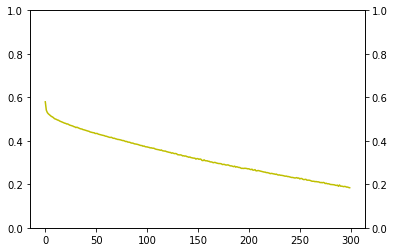

In [65]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [66]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

13/13 [==============================] - 0s 1ms/step - loss: 0.8687 - accuracy: 0.7053
loss_and_metrics : [0.8686932325363159, 0.7052896618843079]


In [67]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)

NameError: ignored